In [1]:
from barrier3d import Barrier3d
from matplotlib import pyplot as plt
from cascade.outwasher import Outwasher
import numpy as np
import os
import copy

In [2]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 60):
    b3d.update()
    b3d.update_dune_domain()
    print('B3D time step: ', b3d._time_index)

B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11


c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1501: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1502: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1503: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


B3D time step:  12
B3D time step:  13
B3D time step:  14
B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3D time step:  54
B3D time step:  55
B3D time step:  56
B3D time step:  57
B3D time step:  58
B3D time step:  59
B3D time step:  60


In [3]:
len(b3d.RSLR)

200

In [4]:
dunes = b3d.DuneDomain[b3d._time_index - 1]
dunes = np.transpose(dunes) + b3d._BermEl

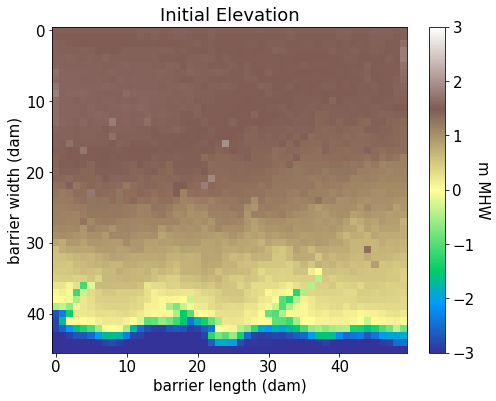

In [7]:
domain = b3d.InteriorDomain
full_domain = np.append(dunes, domain, 0)

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})


### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
#     np.flip(full_domain, 0)*10,
    full_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()


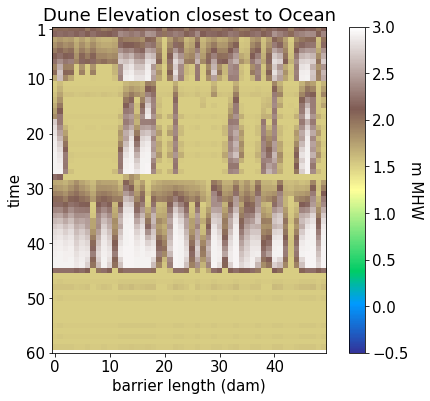

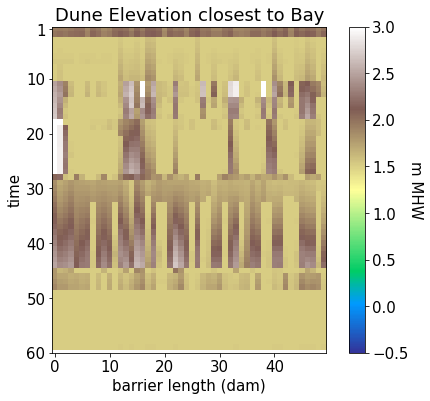

In [6]:
# dunes closest to ocean
dune_array = np.zeros([b3d._time_index-1, b3d._BarrierLength])
for t in range(1, 60):
    beach_dunes = b3d.DuneDomain[t]
    beach_dunes = np.transpose(beach_dunes) + b3d._BermEl
    beach_dunes = beach_dunes[0]
    dune_array[t-1] = beach_dunes
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Ocean")
ax.set_ylabel("time")
ax.set_yticks([0,9,19,29,39,49,59])
labels=['1','10','20','30','40','50','60']
ax.set_yticklabels(labels)
ax.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# dunes closest to bay
dune_array = np.zeros([b3d._time_index-1, b3d._BarrierLength])
for t in range(1, 60):
    beach_dunes = b3d.DuneDomain[t]
    beach_dunes = np.transpose(beach_dunes) + b3d._BermEl
    beach_dunes = beach_dunes[1]
    dune_array[t-1] = beach_dunes
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Bay")
ax.set_ylabel("time")
ax.set_yticks([0,9,19,29,39,49,59])
labels=['1','10','20','30','40','50','60']
ax.set_yticklabels(labels)
ax.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

In [15]:
b3d2 = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 21):
    print('B3D time step: ', b3d2._time_index)
    b3d2.update()
    b3d2.update_dune_domain()
outwash = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_storms="outwash_storms10.npy",
        time_step_count=b3d2._TMAX,
        berm_elev=b3d2._BermEl,
        barrier_length=b3d2._BarrierLength,
        sea_level=b3d2._SL,
        bay_depth=-b3d2._BayDepth,
        interior_domain=b3d2.InteriorDomain,
        dune_domain=b3d.DuneDomain[b3d2._time_index - 1],
        substep=20,
        sediment_flux_coefficient_Ki=7.5E-3,  # b3d = 7.5E-6 for inundation
        washout_to_shoreface=True)
outwash.update(b3d2)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14
B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
 Outwasher Time Step:  479

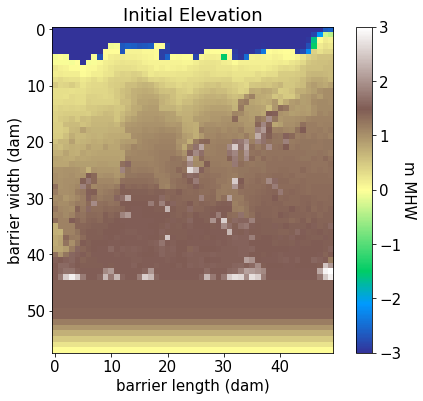

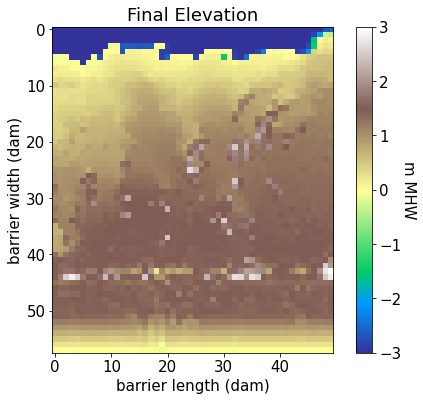

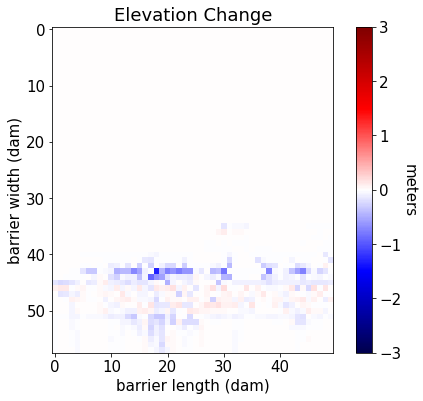

In [16]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash._initial_full_domain
final_domain = outwash._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

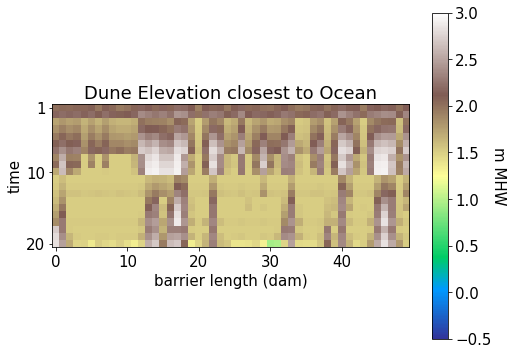

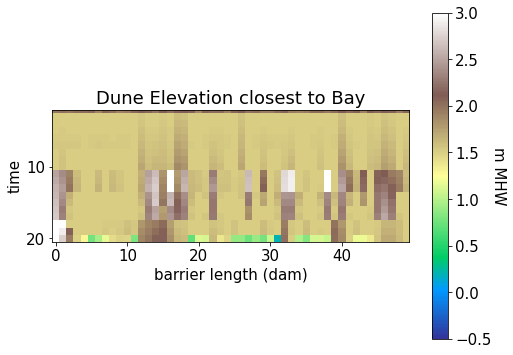

In [23]:
# dunes closest to beach

dune_array2 = np.zeros([b3d2._time_index-1, b3d2._BarrierLength])
for t in range(1, 21):
    beach_dunes2 = b3d2.DuneDomain[t]
    beach_dunes2 = np.transpose(beach_dunes2) + b3d2._BermEl
    beach_dunes2 = beach_dunes2[0]
    dune_array2[t-1] = beach_dunes2
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array2*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Ocean")
ax.set_ylabel("time")
ax.set_yticks([0,9,19])
labels=['1','10','20']
# ax.set_yticks([0,9,19,29,39,49,59])
# labels=['1','10','20','30','40','50','60']
ax.set_yticklabels(labels)
ax.set_xlabel("barrier length (dam)")
# xticklabels({'1, 10, 20, 30, 40, 40, 60'})
plt.gca().xaxis.tick_bottom()

# dunes closest to beach

dune_array2 = np.zeros([b3d2._time_index-1, b3d2._BarrierLength])
for t in range(1, 21):
    beach_dunes2 = b3d2.DuneDomain[t]
    beach_dunes2 = np.transpose(beach_dunes2) + b3d2._BermEl
    beach_dunes2 = beach_dunes2[1]
    dune_array2[t-1] = beach_dunes2
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array2*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Bay")
ax.set_ylabel("time")
ax.set_yticks([0,9,19])
labels=['1','10','20']
# ax.set_yticks([0,9,19,29,39,49,59])
# labels=['1','10','20','30','40','50','60']
ax.set_yticklabels(labels)
ax.set_ylim(bottom=None, top=1)
ax.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

In [ ]:
dunes = b3d2.DuneDomain[b3d2._time_index - 1]
dunes = np.transpose(dunes) + b3d2._BermEl
domain = b3d2.InteriorDomain
full_domain = np.append(dunes, domain, 0)

plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})


### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig4 = plt.figure()
ax4 = fig4.add_subplot(111)
mat4 = ax4.matshow(
#     np.flip(full_domain, 0)*10,
    full_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig4.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax4.set_title("Initial Elevation")
ax4.set_ylabel("barrier width (dam)")
ax4.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams.update({"font.size": 15})
dune_array2 = np.zeros([100, b3d2._BarrierLength])
for t in range(1, 101):
    beach_dunes2 = b3d2.DuneDomain[t]
    beach_dunes2 = np.transpose(beach_dunes2) + b3d2._BermEl
    beach_dunes2 = beach_dunes2[0]
    dune_array2[t-1] = beach_dunes2
# print(dune_array)
fig = plt.figure()
ax = fig.add_subplot(111)
mat = ax.matshow(
#     np.flip(full_domain, 0)*10,
    dune_array2*10,
    cmap="terrain",
    vmin=-0.5, vmax=3.0,
)
cbar = fig.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax.set_title("Dune Elevation closest to Ocean")
ax.set_ylabel("time")
ax.set_yticks([0,9,19,29,39,49,59,69,79,89,99])
labels=['1','10','20','30','40','50','60','70','80','90','100']
ax.set_yticklabels(labels)
ax.set_xlabel("barrier length (dam)")
# xticklabels({'1, 10, 20, 30, 40, 40, 60'})
plt.gca().xaxis.tick_bottom()